In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
df = pd.read_csv('/content/Fraud_Analysis_Dataset.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df.shape

(11142, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,10000
1,1142


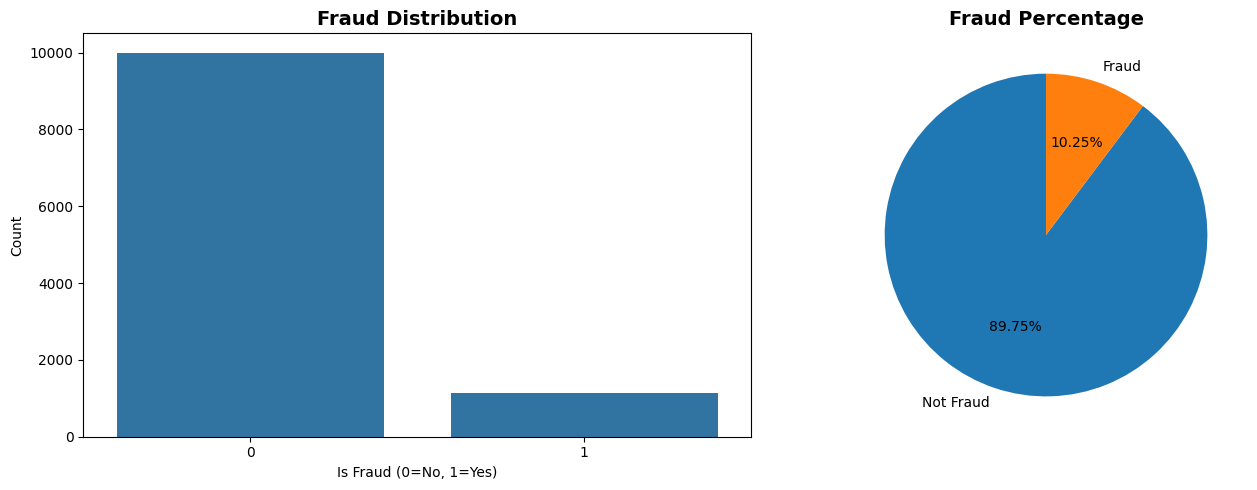

In [ ]:
# Visualize fraud distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='isFraud', ax=axes[0])
axes[0].set_title('Fraud Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Is Fraud (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

# Pie chart
fraud_counts = df['isFraud'].value_counts()
axes[1].pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.2f%%', startangle=90)
axes[1].set_title('Fraud Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

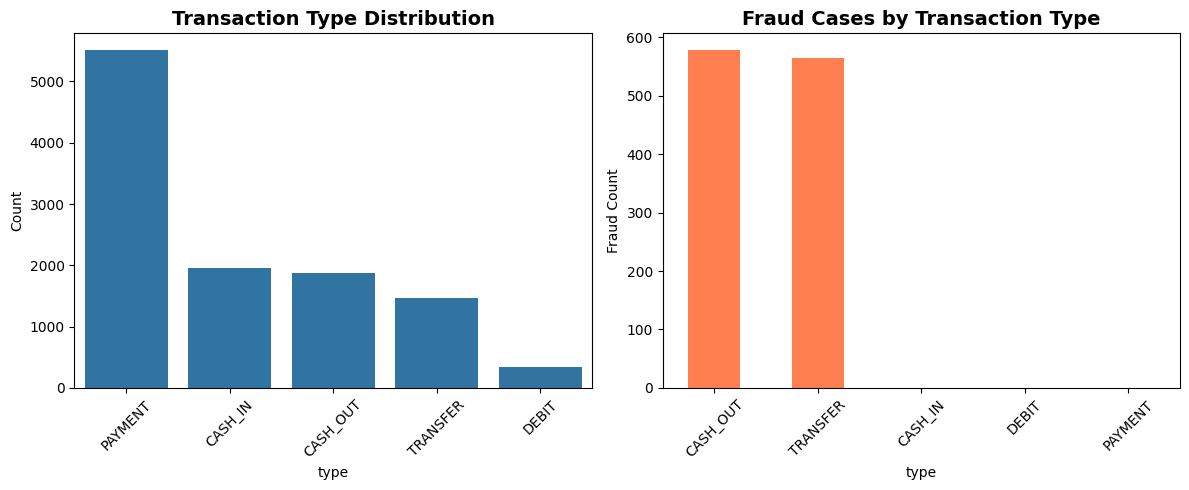

In [ ]:
# Transaction type distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', color='coral')
plt.title('Fraud Cases by Transaction Type', fontsize=14, fontweight='bold')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

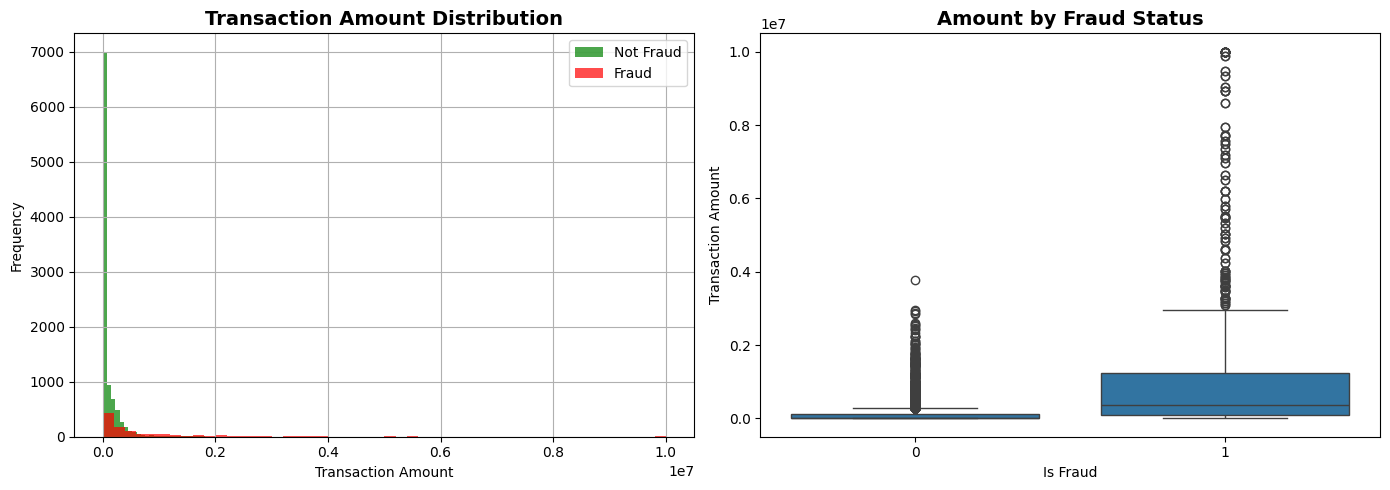

In [ ]:
# Amount distribution for fraud vs non-fraud
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
df[df['isFraud']==0]['amount'].hist(bins=50, alpha=0.7, label='Not Fraud', color='green')
df[df['isFraud']==1]['amount'].hist(bins=50, alpha=0.7, label='Fraud', color='red')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='isFraud', y='amount')
plt.title('Amount by Fraud Status', fontsize=14, fontweight='bold')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [ ]:
# Create a copy for feature engineering
df_fe = df.copy()

# Feature 1: Balance difference for origin account
df_fe['balanceDiff_Orig'] = df_fe['oldbalanceOrg'] - df_fe['newbalanceOrig']

# Feature 2: Balance difference for destination account
df_fe['balanceDiff_Dest'] = df_fe['newbalanceDest'] - df_fe['oldbalanceDest']

# Feature 3: Is the origin account emptied?
df_fe['isOriginEmpty'] = (df_fe['newbalanceOrig'] == 0).astype(int)

# Feature 4: Transaction amount as percentage of origin balance
df_fe['amountPercent_Orig'] = df_fe['amount'] / (df_fe['oldbalanceOrg'] + 1)  # +1 to avoid division by zero

# Feature 5: Error in balancing (should be zero for legitimate transactions)
df_fe['errorBalanceOrig'] = df_fe['balanceDiff_Orig'] - df_fe['amount']
df_fe['errorBalanceDest'] = df_fe['balanceDiff_Dest'] - df_fe['amount']

# Feature 6: Encode transaction type
le_type = LabelEncoder()
df_fe['type_encoded'] = le_type.fit_transform(df_fe['type'])

print("New features created!")
print("\nUpdated dataset shape:", df_fe.shape)
df_fe.head()

New features created!

Updated dataset shape: (11142, 17)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balanceDiff_Orig,balanceDiff_Dest,isOriginEmpty,amountPercent_Orig,errorBalanceOrig,errorBalanceDest,type_encoded
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0,1,0.994505,0.0,-181.0,4
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0,1,0.994505,0.0,-21363.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0,1,0.999644,0.0,-2806.0,4
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0,1,0.999644,0.0,-29008.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0,1,0.999950,0.0,-20128.0,4


In [ ]:
# Select features for modeling
# Dropping name columns as they are identifiers, not predictive features
feature_cols = [
    'step', 'type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest', 'balanceDiff_Orig', 'balanceDiff_Dest',
    'isOriginEmpty', 'amountPercent_Orig', 'errorBalanceOrig', 'errorBalanceDest'
]

X = df_fe[feature_cols]
y = df_fe['isFraud']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (11142, 13)
Target shape: (11142,)

Feature columns:
['step', 'type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balanceDiff_Orig', 'balanceDiff_Dest', 'isOriginEmpty', 'amountPercent_Orig', 'errorBalanceOrig', 'errorBalanceDest']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Handle class imbalance using SMOTE
# SMOTE creates synthetic samples for the minority class
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy=0.5)  # Balance to 50% of majority

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print("Balanced training set size:", X_train_balanced.shape)
print("\nBalanced fraud distribution:")
print(pd.Series(y_train_balanced).value_counts())

After SMOTE:
Balanced training set size: (11998, 13)

Balanced fraud distribution:
isFraud
0    7999
1    3999
Name: count, dtype: int64


In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """
    Train and evaluate a classification model
    """
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate probabilities for ROC-AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
     # Print results
    print(f"\nTraining Accuracy: {train_accuracy*100:.2f}%")
    print(f"Testing Accuracy:  {test_accuracy*100:.2f}%")
    print(f"Precision:         {precision*100:.2f}%")
    print(f"Recall:            {recall*100:.2f}%")
    print(f"F1-Score:          {f1*100:.2f}%")
    print(f"ROC-AUC Score:     {roc_auc*100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    print("\nConfusion Matrix:")
    print(cm)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test, target_names=['Not Fraud', 'Fraud']))

    # Store results
    results = {
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'ROC_AUC': roc_auc,
        'Confusion_Matrix': cm,
        'Predictions': y_pred_test,
        'Probabilities': y_pred_proba
    }

    return results

In [ ]:
# Random Forest with optimized hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_results = evaluate_model(rf_model, X_train_balanced, y_train_balanced, X_test, y_test, "Random Forest")


Training Random Forest...

Training Accuracy: 100.00%
Testing Accuracy:  99.96%
Precision:         100.00%
Recall:            99.56%
F1-Score:          99.78%
ROC-AUC Score:     100.00%

Confusion Matrix:
[[2001    0]
 [   1  227]]

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2001
       Fraud       1.00      1.00      1.00       228

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [ ]:
# XGBoost with optimized hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

xgb_results = evaluate_model(xgb_model, X_train_balanced, y_train_balanced, X_test, y_test, "XGBoost")


Training XGBoost...

Training Accuracy: 99.99%
Testing Accuracy:  99.96%
Precision:         100.00%
Recall:            99.56%
F1-Score:          99.78%
ROC-AUC Score:     100.00%

Confusion Matrix:
[[2001    0]
 [   1  227]]

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2001
       Fraud       1.00      1.00      1.00       228

    accuracy                           1.00      2229
   macro avg       1.00      1.00      1.00      2229
weighted avg       1.00      1.00      1.00      2229



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=10,            # Controls overfitting
    min_samples_split=10,    # Minimum samples required to split
    min_samples_leaf=5,      # Minimum samples in leaf node
    max_features='sqrt',    # Use subset of features
    class_weight='balanced', # Important for fraud datasets
    random_state=42
)

dt_results = evaluate_model(
    dt_model,
    X_train_balanced,
    y_train_balanced,
    X_test,
    y_test,
    "Decision Tree"
)



Training Decision Tree...

Training Accuracy: 99.93%
Testing Accuracy:  99.69%
Precision:         97.42%
Recall:            99.56%
F1-Score:          98.48%
ROC-AUC Score:     99.78%

Confusion Matrix:
[[1995    6]
 [   1  227]]

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2001
       Fraud       0.97      1.00      0.98       228

    accuracy                           1.00      2229
   macro avg       0.99      1.00      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    C=1.0,                 # Regularization strength
    penalty='l2',          # Prevents overfitting
    solver='lbfgs',        # Good default solver
    max_iter=1000,         # Increase iterations for convergence
    class_weight='balanced',  # VERY useful for fraud datasets
    random_state=42
)

lr_results = evaluate_model(
    lr_model,
    X_train_balanced,
    y_train_balanced,
    X_test,
    y_test,
    "Logistic Regression"
)



Training Logistic Regression...

Training Accuracy: 98.81%
Testing Accuracy:  98.88%
Precision:         98.10%
Recall:            90.79%
F1-Score:          94.31%
ROC-AUC Score:     98.73%

Confusion Matrix:
[[1997    4]
 [  21  207]]

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99      2001
       Fraud       0.98      0.91      0.94       228

    accuracy                           0.99      2229
   macro avg       0.99      0.95      0.97      2229
weighted avg       0.99      0.99      0.99      2229



In [ ]:
# Compile all results
all_results = [rf_results, xgb_results, dt_results, lr_results]

# Create comparison dataframe
comparison_df = pd.DataFrame([
    {
        'Model': r['Model'],
        'Train Accuracy': f"{r['Train_Accuracy']*100:.2f}%",
        'Test Accuracy': f"{r['Test_Accuracy']*100:.2f}%",
        'Precision': f"{r['Precision']*100:.2f}%",
        'Recall': f"{r['Recall']*100:.2f}%",
        'F1-Score': f"{r['F1_Score']*100:.2f}%",
        'ROC-AUC': f"{r['ROC_AUC']*100:.2f}%"
    }
    for r in all_results
])

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))



MODEL COMPARISON SUMMARY
              Model Train Accuracy Test Accuracy Precision Recall F1-Score ROC-AUC
      Random Forest        100.00%        99.96%   100.00% 99.56%   99.78% 100.00%
            XGBoost         99.99%        99.96%   100.00% 99.56%   99.78% 100.00%
      Decision Tree         99.93%        99.69%    97.42% 99.56%   98.48%  99.78%
Logistic Regression         98.81%        98.88%    98.10% 90.79%   94.31%  98.73%


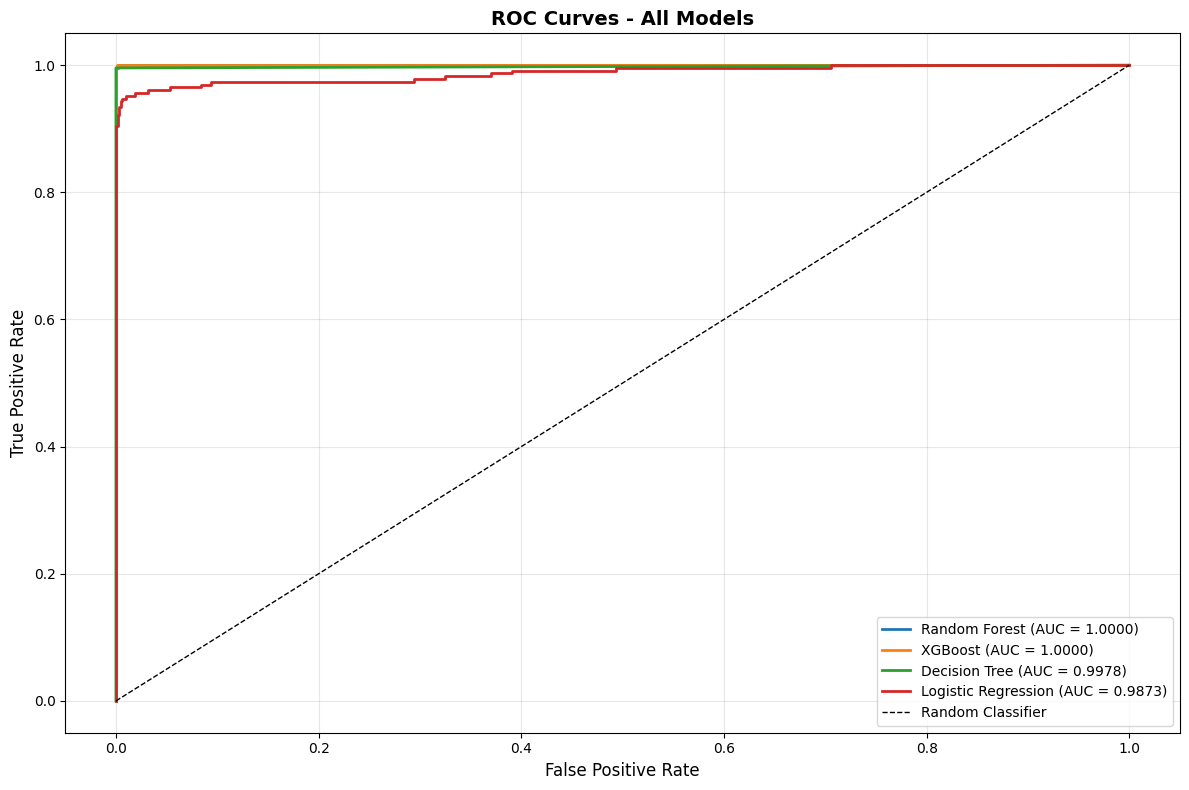

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

for result in all_results:
    fpr, tpr, _ = roc_curve(y_test, result['Probabilities'])
    plt.plot(fpr, tpr, label=f"{result['Model']} (AUC = {result['ROC_AUC']:.4f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

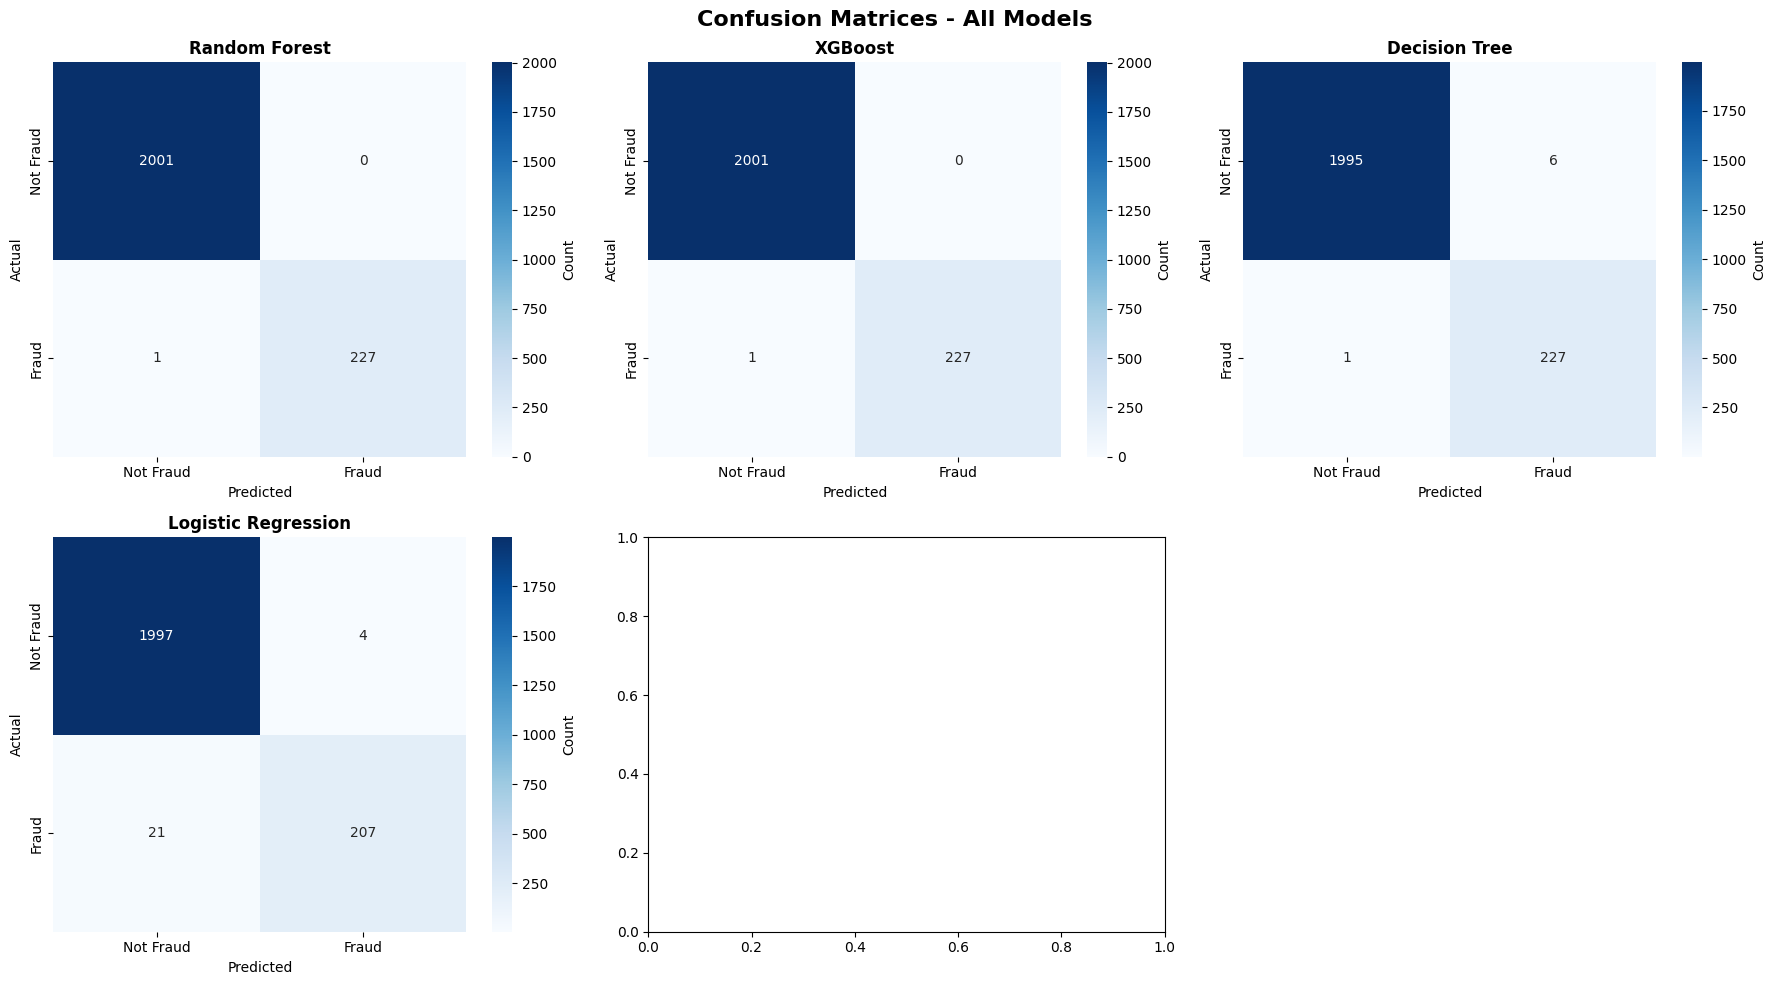

In [ ]:
# Visualize confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')

for idx, result in enumerate(all_results):
    row = idx // 3
    col = idx % 3

    sns.heatmap(result['Confusion_Matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'],
                ax=axes[row, col], cbar_kws={'label': 'Count'})
    axes[row, col].set_title(result['Model'], fontweight='bold')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_xlabel('Predicted')

# Remove the extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()